## Air Quality Prediction project

## About Dataset
### Context
##### The variation in indoor gas concentration over time is monitored and data is stored in order to use this information to evaluate the type of activity carried out in the room. Thanks to the use of artificial intelligence, a quantitative approach in determining the gas concentration was avoided, which would have required careful calibration of the sensors. The dataset contains the values ​​acquired by an array of 6 low cost sensors in successive instants of time, and the stored values ​​are associated with the particular action that generated them. Through an appropriate data processing, based on machine learning algorithms, after an initial training phase it is possible to recognize the actions that are carried out inside the home.

### Content
##### The presence of chemicals in the air is determined through a series of electrochemical gas sensors that have been selected based on the stated technical specifications on the ability to detect classes of compounds. The sensor set can be grouped into two main categories:

##### 1. MQ sensors (MQ2, MQ9, MQ135, MQ137, MQ138) which have great sensitivity, low latency and low cost; each sensor can respond to different gases;
##### 2. Analog CO2 gas sensor (MG-811) which has excellent sensitivity to carbon dioxide and is scarcely affected by the temperature and humidity of the air.

### The dataset contains 1845 collected samples describing 4 target situations:
##### 1 - Normal situation - Activity: clean air, a person sleeping or studying or resting - Samples: 595;
##### 2 - Preparing meals - Activities: cooking meat or pasta, fried vegetables. One or two people in the room, forced air circulation - Samples: 515.
##### 3 - Presence of smoke - Activity: burning paper and wood for a short period of time in a room with closed windows and doors - Example: 195.
##### 4 - Cleaning - Activity: use of spray and liquid detergents with ammonia and / or alcohol. Forced air circulation can be activated or deactivated - Samples: 540.
##### Each sample is made up of 7 values; the first six values ​​are the sensor outputs, while the last is the index of the action that generated the values ​​acquired by the sensors. The four different situations are associated with a fairly different composition of the air, taking into account that any activity produces chemical substances due, that is, to human respiration, to the exhalations of metabolic processes, to the release of volatiles by combustion and / or oxidation, and evaporation of household detergents.

### Acknowledgements
##### Gambi, Ennio (2020), “Air Quality dataset for ADL classification”, Mendeley Data, V1, doi: 10.17632/kn3x9rz3kd.1


632/kn3x9rz3kd.1

###### Why i decided to do the project
###### The intention is to build a smart monitoring system that can study the Air Quality in an enclosed space and give possible prediction of what the amount of CO2 in the enclosed space.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

import shap

In [2]:
# pip install shap

In [3]:
filepath = r"C:\Users\maseglo.com\Documents\The Data Science Studio\DS Projects\Air Quarlity Prediction\dataset.csv"
Aq_df = pd.read_csv(filepath)
Aq_df.head()

,670,696,1252,1720,1321,2431,4
0,641,674,1156,1652,1410,2433,4
1,642,646,1159,1643,1455,2361,4
2,640,590,1105,1608,1459,2427,4
3,616,627,1192,1637,1466,2447,4
4,780,896,1438,1813,1489,2434,4


##### The data appears to be without column names, so we them Sr1 to Sr6 for the six low cost array of sensors and then CO2

In [4]:
AQ_data = pd.read_csv(filepath, names=['Sr1', 'Sr2', 'Sr3', 'Sr4', 'Sr5', 'Sr6', 'CO2'])
AQ_data

,Sr1,Sr2,Sr3,Sr4,Sr5,Sr6,CO2
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


In [5]:
AQ_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sr1     1845 non-null   int64
 1   Sr2     1845 non-null   int64
 2   Sr3     1845 non-null   int64
 3   Sr4     1845 non-null   int64
 4   Sr5     1845 non-null   int64
 5   Sr6     1845 non-null   int64
 6   CO2     1845 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB


##### Let's Check the relationship between the readings of each sensor and the CO2 in the room

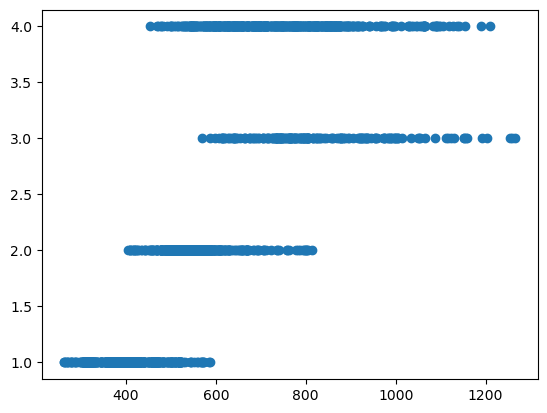

In [6]:
plt.scatter(x="Sr1", y= "CO2", data=AQ_data)

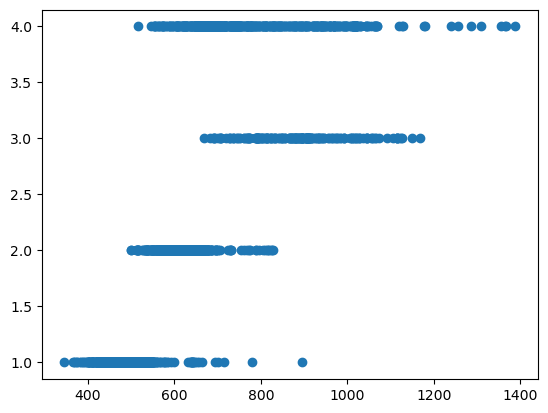

In [7]:
plt.scatter(x="Sr2", y= "CO2", data=AQ_data)

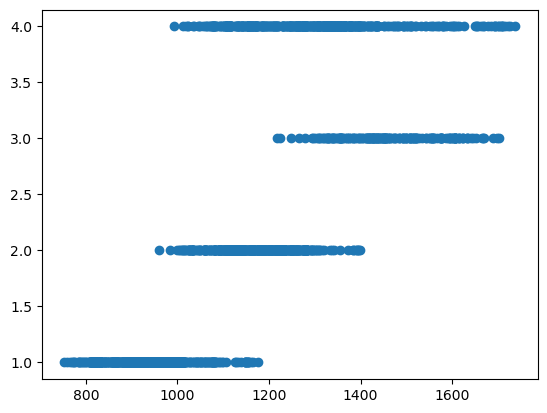

In [8]:
plt.scatter(x="Sr3", y= "CO2", data=AQ_data)

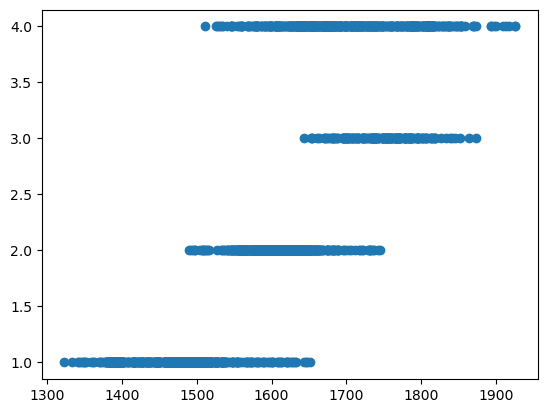

In [9]:
plt.scatter(x="Sr4", y= "CO2", data=AQ_data)

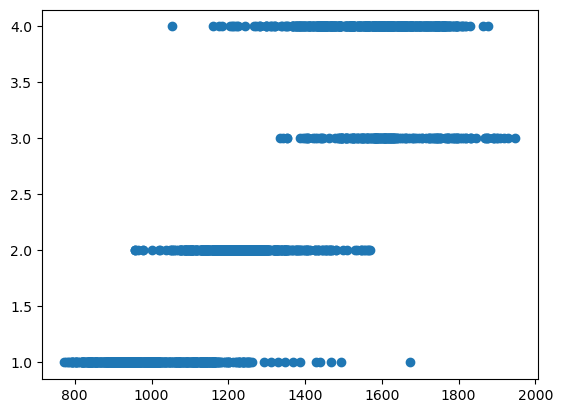

In [10]:
plt.scatter(x="Sr5", y= "CO2", data=AQ_data)

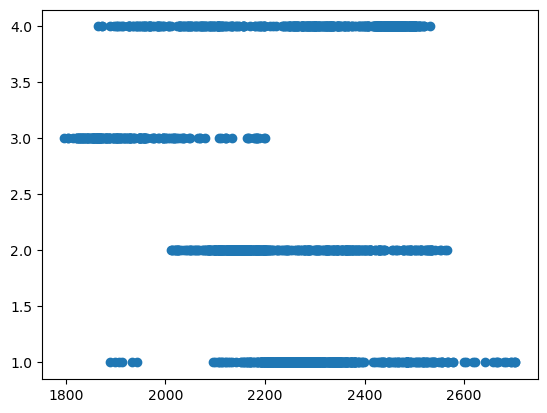

In [11]:
plt.scatter(x="Sr6", y= "CO2", data=AQ_data)

In [12]:
# Example of a preprocessing function
def preprocess_inputs(data):
    # Separate features and target
    X = AQ_data.drop(columns='CO2')
    y = AQ_data['CO2']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [13]:
# Use the preprocessing function
X_train, X_test, y_train, y_test = preprocess_inputs(AQ_data)

# Display the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1476, 6)
X_test shape: (369, 6)
y_train shape: (1476,)
y_test shape: (369,)


# Model Trainig

In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [15]:
acc = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 95.93%


In [16]:
model.classes_

array([1, 2, 3, 4], dtype=int64)

In [17]:
model.predict_proba(X_test)

array([[0.  , 0.01, 0.96, 0.03],
       [0.  , 0.77, 0.05, 0.18],
       [0.01, 0.99, 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.69, 0.15, 0.16],
       [0.  , 0.  , 0.  , 1.  ]])

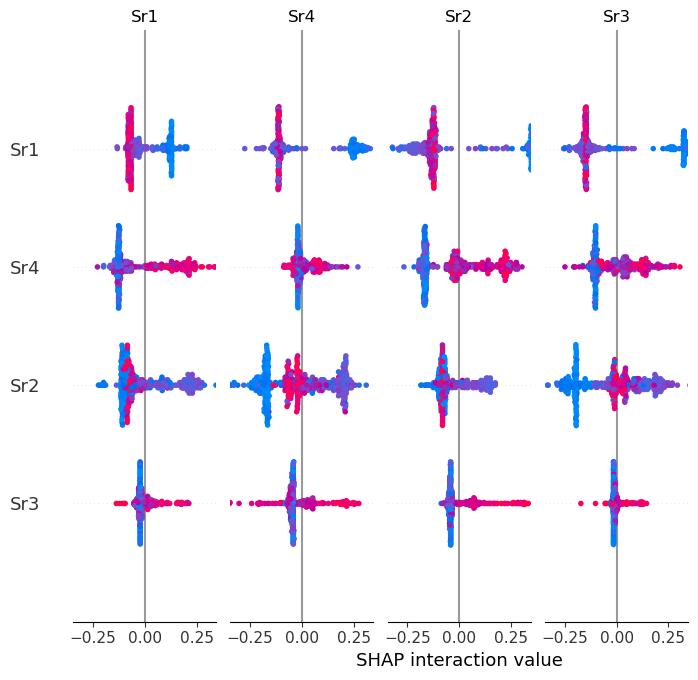

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=model.classes_)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Fit the model using X_train.drop('Sr5', axis=1) and y_train
model.fit(X_train.drop('Sr5', axis=1), y_train)

# Evaluate the model's accuracy using X_test.drop('Sr5', axis=1) and y_test
acc = model.score(X_test.drop('Sr5', axis=1), y_test)

# Print the accuracy
print("Accuracy: {:.2f}%".format(acc * 100))


Accuracy: 94.31%
